In [1]:
#importing all the libraries
#Some of the references are taken from books and open-souce materials 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
from numpy.random import randn
from sklearn.ensemble import StackingRegressor
from numpy.random import seed
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from lightgbm import LGBMRegressor
from matplotlib import colors
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import model_selection
from math import *
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
np.random.seed(99)  #90 #95 #0


'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 
wrn.simplefilter('ignore')

In [2]:
#reading data from csv
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_t = train['SalePrice']
test_id = test['Id'].copy()

In [3]:
#shape of training data
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nShape of training data: ',train.shape,'\n\n')
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


Shape of training data:  (1460, 81) 


"""""""""""""""""""""""""""""""""""""""


In [4]:
#shape of testing data
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nShape of testing data: ',test.shape,'\n\n')
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


Shape of testing data:  (1459, 80) 


"""""""""""""""""""""""""""""""""""""""


In [5]:
#name of columns in train data
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nName of columns in train data:\n\n',train.columns,'\n\n')
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


Name of columns in train data:

 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish',

In [6]:
#name of columns in test data
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nName of columns in test data:\n\n',test.columns,'\n\n')
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


Name of columns in test data:

 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 

In [7]:
#printing top 5 rows in train data 
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nDisplaying top 5 entries in train data:\n\n',train.head(5),'\n\n')
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


Displaying top 5 entries in train data:

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN    

In [8]:
#print top5 rows in testing data
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nDisplaying top 5 entries in test data:\n\n',test.head(5),'\n\n')
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


Displaying top 5 entries in test data:

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN  

"""""""""""""""""""""""""""""""""""""""


Our final target is Sale Price, so displaying it's distribution: 


"""""""""""""""""""""""""""""""""""""""


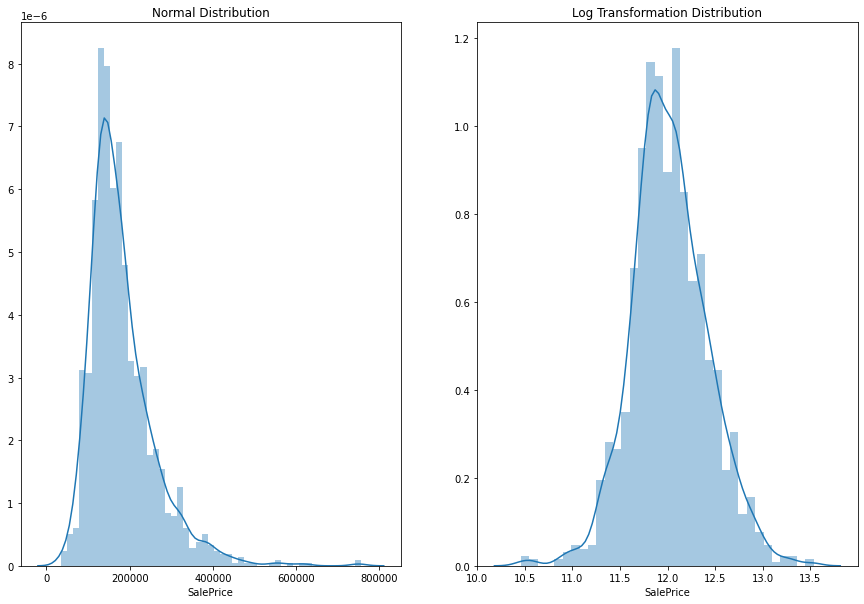

In [9]:
#Histogram Plot 
print('"""""""""""""""""""""""""""""""""""""""')
print("\n\nOur final target is Sale Price, so displaying it's distribution: \n\n")
_, (ax1, ax2) = plt.subplots(figsize=(15,10), ncols=2)
sns.distplot(train['SalePrice'], ax=ax1).set_title('Normal Distribution')
sns.distplot(np.log(train['SalePrice']), ax=ax2).set_title('Log Transformation Distribution')
print('"""""""""""""""""""""""""""""""""""""""')

In [10]:
#Printing Information
print('"""""""""""""""""""""""""""""""""""""""')
print("\n\nSo we will use log transformation of sale price as it do not contain skewness \n\n")
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


So we will use log transformation of sale price as it do not contain skewness 


"""""""""""""""""""""""""""""""""""""""


In [11]:
#Adding extra column to differntiate between train and test and concatinate to df for preprocessing
train['diff']  = 1
test['diff']  = 0
df = pd.concat([train, test], axis=0,sort=False)

"""""""""""""""""""""""""""""""""""""""


Plotting Categorical columns


"""""""""""""""""""""""""""""""""""""""


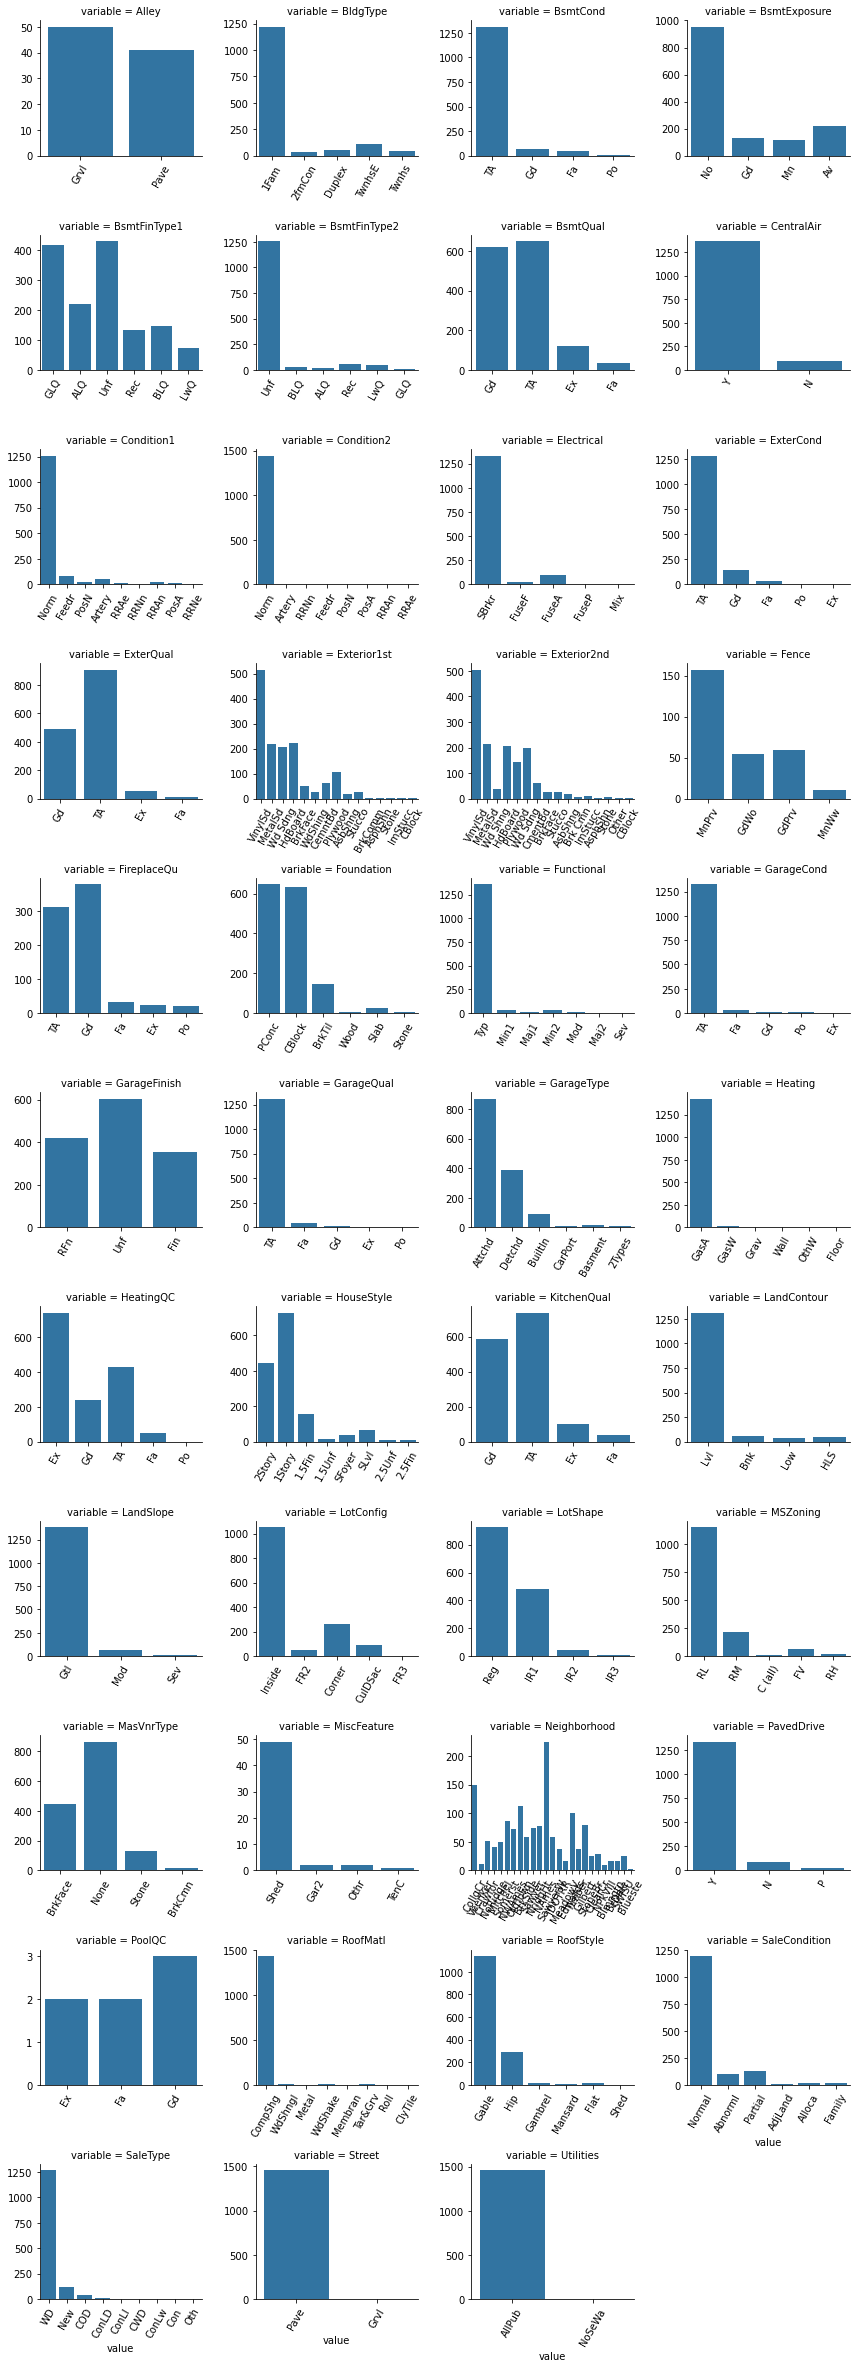

In [12]:
# Count plots of categorical features
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nPlotting Categorical columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
cat = df.select_dtypes(exclude = ['int64', 'float64'])
f = pd.melt(train, value_vars=sorted(cat))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False,palette='RdBu')
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

"""""""""""""""""""""""""""""""""""""""


Plotting Numerical Columns


"""""""""""""""""""""""""""""""""""""""


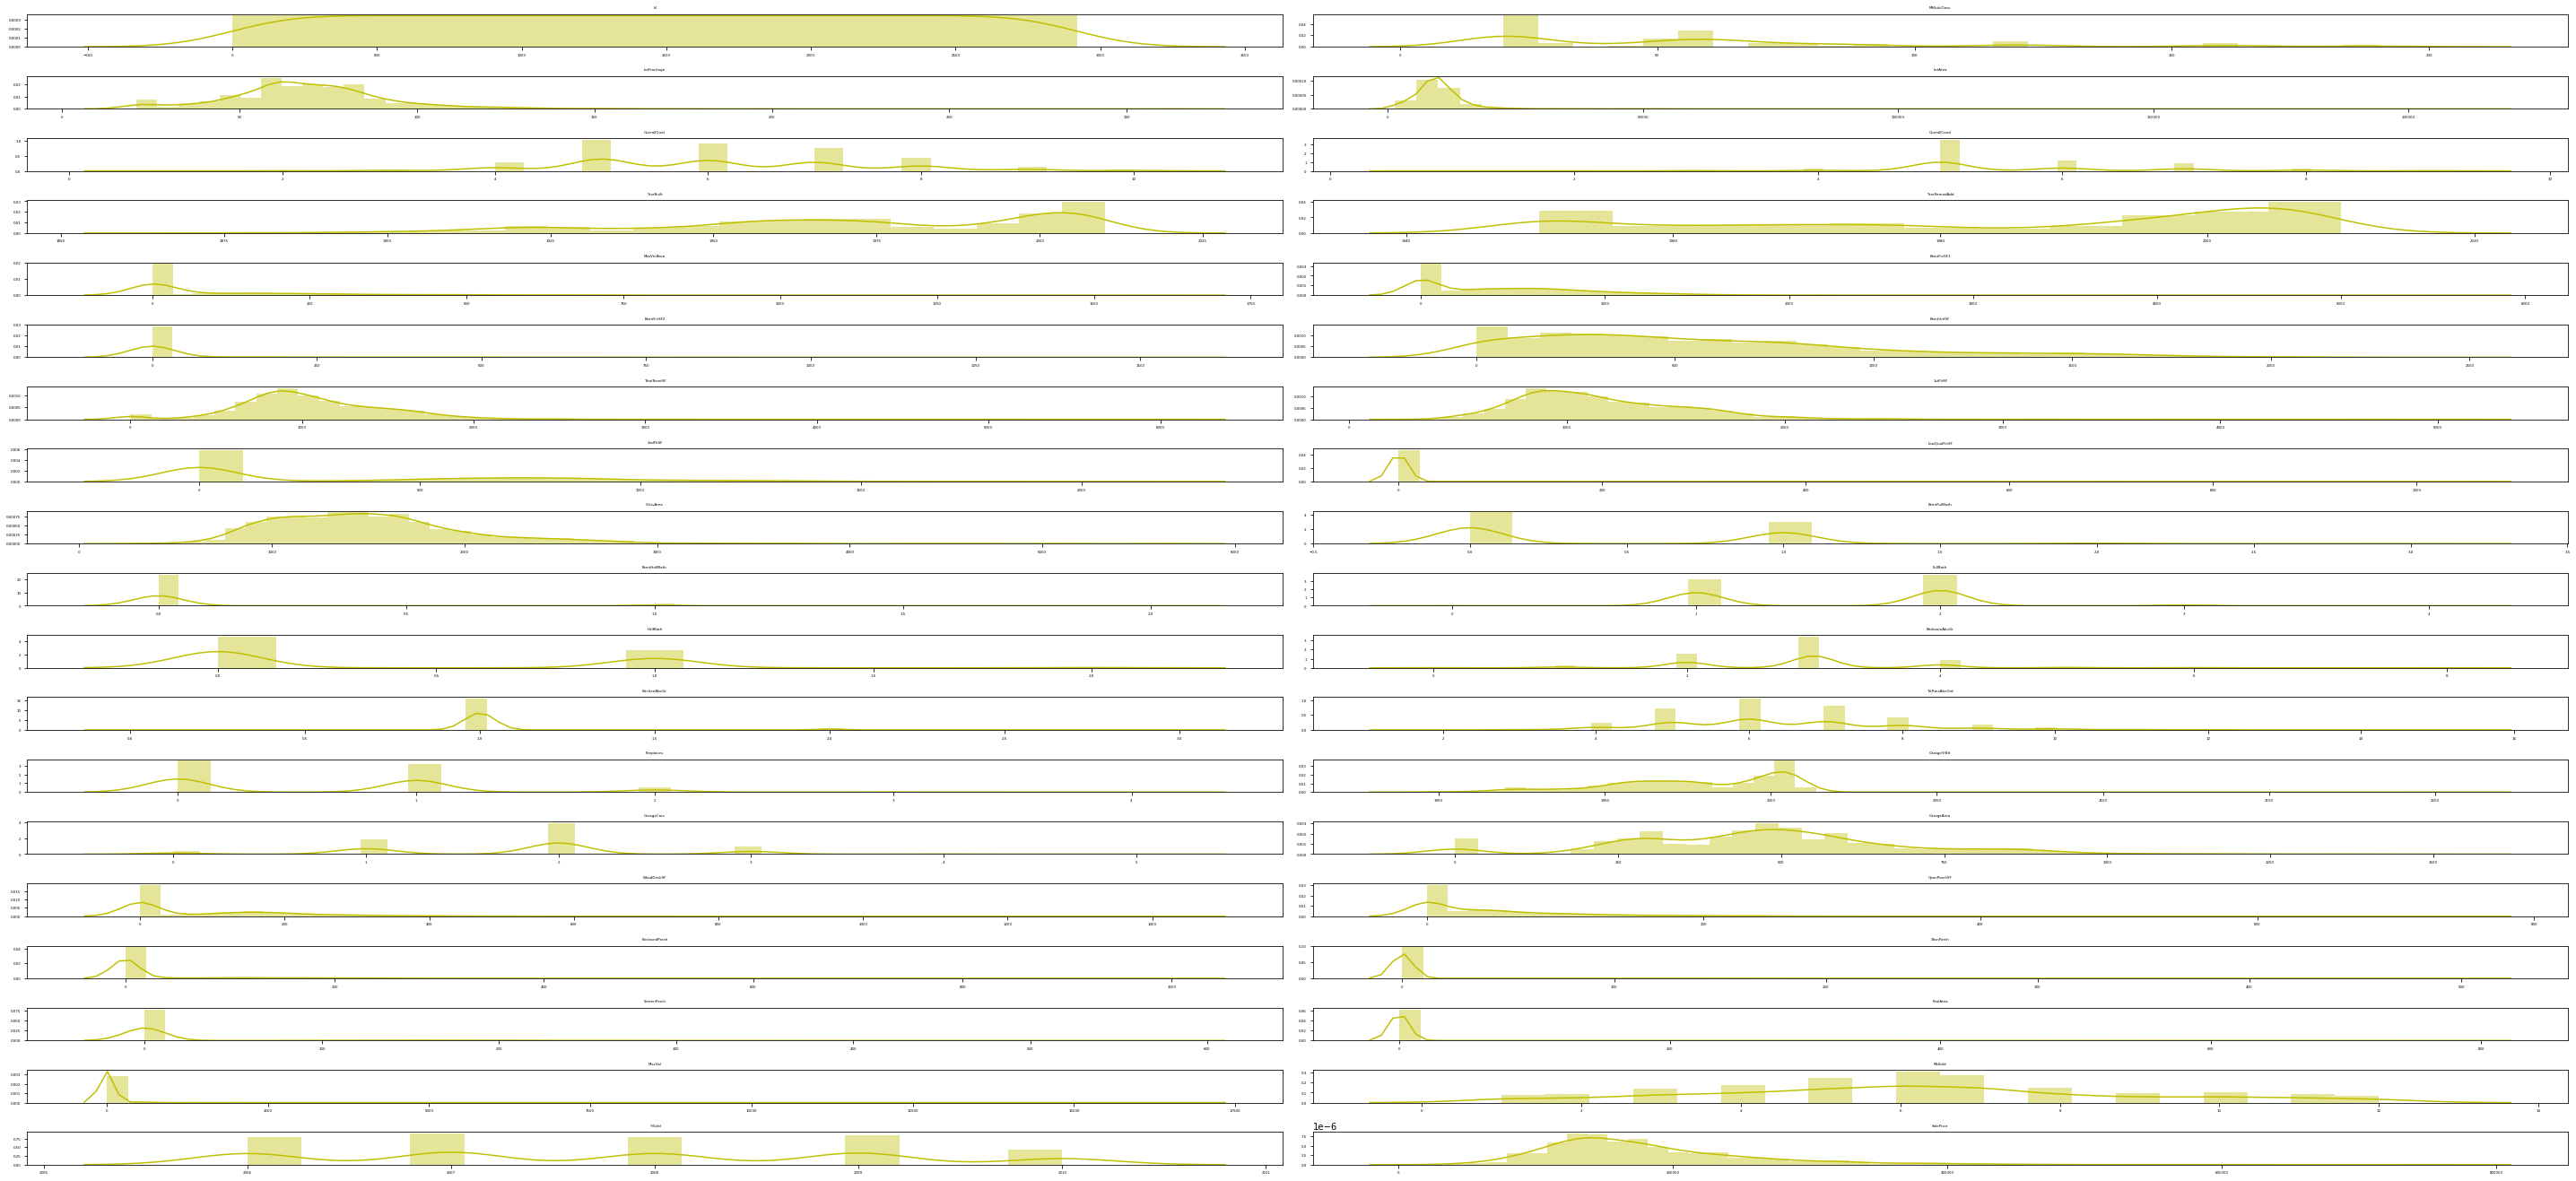

In [13]:
#plotting numerical values
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nPlotting Numerical Columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
num = df.select_dtypes(include = ['int64', 'float64'])
fig, axes = plt.subplots(nrows = 19, ncols = 2, figsize = (40, 20))
for ax, column in zip(axes.flatten(), num.columns):
    sns.distplot(num[column].dropna(), ax = ax, color = 'y')
    ax.set_title(column, fontsize = 4)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 4)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

In [14]:
#count of null values
null_columns = df.isnull().sum()
null_columns.sort_values(ascending=False, inplace= True)
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nNumber of null columns according to values:\n\n',null_columns, '\n\n')
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


Number of null columns according to values:

 PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
SalePrice      1459
               ... 
1stFlrSF          0
CentralAir        0
Heating           0
Foundation        0
Id                0
Length: 82, dtype: int64 


"""""""""""""""""""""""""""""""""""""""


In [15]:
#percentage of missing values 
miss_per = df.isna().mean().round(4) * 100
miss_per.sort_values(ascending=False, inplace=True)
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nMissing Percentage:\n\n',miss_per, '\n\n')
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


Missing Percentage:

 PoolQC         99.66
MiscFeature    96.40
Alley          93.22
Fence          80.44
SalePrice      49.98
               ...  
1stFlrSF        0.00
CentralAir      0.00
Heating         0.00
Foundation      0.00
Id              0.00
Length: 82, dtype: float64 


"""""""""""""""""""""""""""""""""""""""


In [16]:
#function to plot missing percentage
def missing_percentage(data, width=18, height=10, color=('silver', 'gold','lightgreen','skyblue','lightpink'), edgecolor='black'):
    fig, ax = plt.subplots(figsize=(width, height))

    allna = (data.isnull().sum() / len(data))*100
    tightout= 0.008*max(allna)
    allna = allna.drop(allna[allna == 0].index).sort_values().reset_index()
    mn= ax.barh(allna.iloc[:,0], allna.iloc[:,1], color=color, edgecolor=edgecolor)
    ax.set_title('Missing values percentage', fontsize=15, weight='bold' )
    ax.set_xlabel('Percentage', weight='bold', size=15)
    ax.set_ylabel('Features with missing values', weight='bold')
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    for i in ax.patches:
        ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',
            fontsize=10, fontweight='bold', color='grey')
    return plt.show()

"""""""""""""""""""""""""""""""""""""""


Plotting Missing Percentage


"""""""""""""""""""""""""""""""""""""""


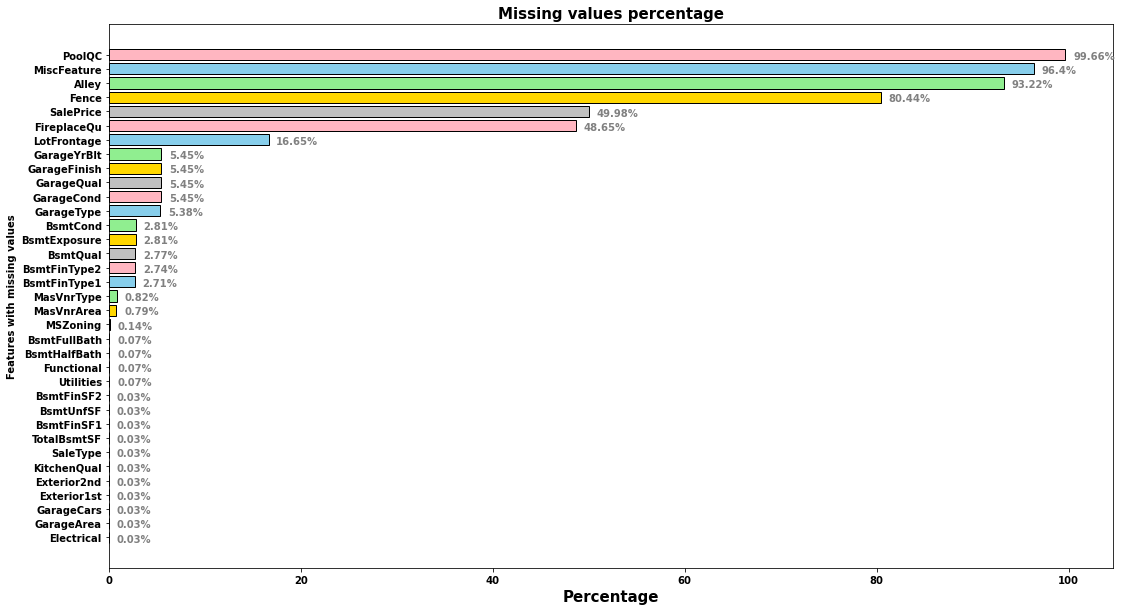

In [17]:
#plotting missing percentage
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nPlotting Missing Percentage\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
missing_percentage(df)

In [18]:
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\n Deleteing all the features with missing percentage greater than 75% \n\n');
print(miss_per[miss_per>75.00],'\n\n')
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


 Deleteing all the features with missing percentage greater than 75% 


PoolQC         99.66
MiscFeature    96.40
Alley          93.22
Fence          80.44
dtype: float64 


"""""""""""""""""""""""""""""""""""""""


In [19]:
#Drop PoolQC, MiscFeature, Alley and Fence features
print('"""""""""""""""""""""""""""""""""""""""')
df = df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""


In [20]:
#corelation of sale price with every parameter
num_corr = df.corr()
table = num_corr['SalePrice'].sort_values(ascending=False).to_frame()
cm = sns.light_palette('green',as_cmap=True)
tb = table.style.background_gradient(cm)
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nPlotting Correlation values\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
tb

"""""""""""""""""""""""""""""""""""""""


Plotting Correlation values


"""""""""""""""""""""""""""""""""""""""


,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


"""""""""""""""""""""""""""""""""""""""


Plotting Heat Map


"""""""""""""""""""""""""""""""""""""""


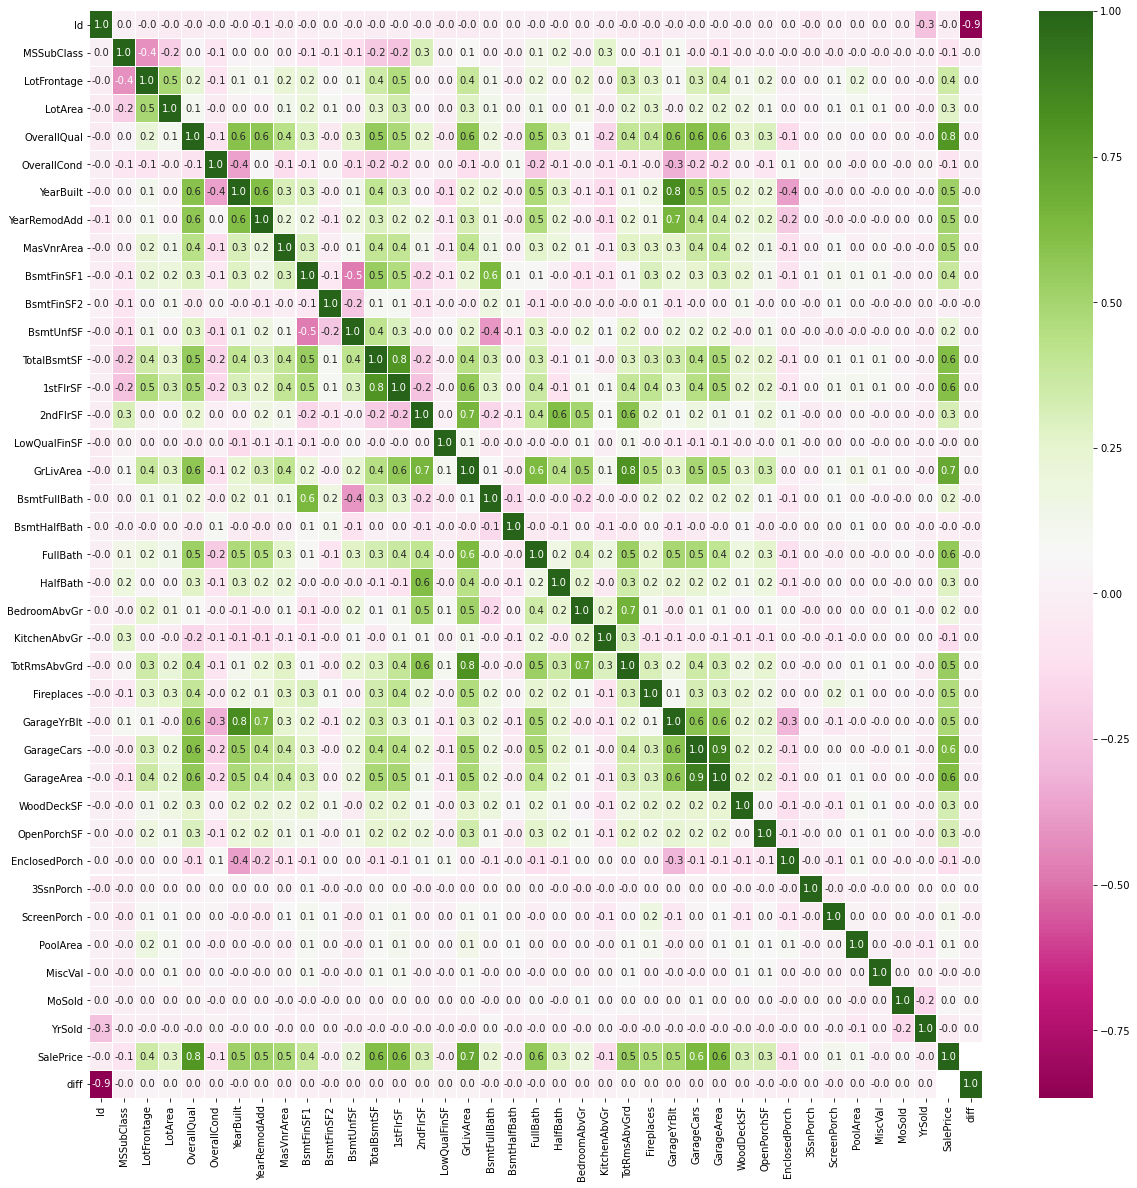

In [21]:
#heatplot
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nPlotting Heat Map\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, linewidths=.1, fmt= '.1f',ax=ax, cmap="PiYG")

In [22]:
#dropping non correlated values
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nDropping not related columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
df = df.drop(['Heating','RoofMatl','Condition2','Street'],axis=1)

"""""""""""""""""""""""""""""""""""""""


Dropping not related columns


"""""""""""""""""""""""""""""""""""""""


In [23]:
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nPreprocessing Fireplace Columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
df['Fireplaces'][df['FireplaceQu'].isnull()==True].describe()

"""""""""""""""""""""""""""""""""""""""


Preprocessing Fireplace Columns


"""""""""""""""""""""""""""""""""""""""


count    1420.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Fireplaces, dtype: float64

In [24]:
print(df['FireplaceQu'].value_counts())

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64


In [25]:
# Imputing the missing values if no information about fireplace then there is no fireplace so none
df.loc[df['FireplaceQu'].isnull(),'FireplaceQu'] = 'None'

In [26]:
#Crosstab between FirePlaces ad FirePlace Quality
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nCross Tab between Fireplaces and Fireplace Quality:\n')
print(pd.crosstab(df.Fireplaces, df.FireplaceQu))
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


Cross Tab between Fireplaces and Fireplace Quality:

FireplaceQu  Ex  Fa   Gd  None  Po   TA
Fireplaces                             
0             0   0    0  1420   0    0
1            37  63  627     0  46  495
2             5  10  112     0   0   92
3             1   1    5     0   0    4
4             0   0    0     0   0    1
"""""""""""""""""""""""""""""""""""""""


In [27]:
#relationship between LotFrontage and LotArea
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nCorrelation between LotFrontage and LotArea:\t',df['LotFrontage'].corr(np.sqrt(df['LotArea'])),'\n\n')
#that's above 50% so we can find LotFrontage with the help of sqrt LotArea
df.LotFrontage[df['LotFrontage'].isnull()]=np.sqrt(df.LotArea[df['LotFrontage'].isnull()])
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


Correlation between LotFrontage and LotArea:	 0.6476580398617832 


"""""""""""""""""""""""""""""""""""""""


In [28]:
#Handling all garage columns at once
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nHandling Garage Columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
df[garage_cols][df['GarageType'].isnull()==True]
#Garage Imputation
for cols in garage_cols:
    if df[cols].dtype==np.object:
        df.loc[df[cols].isnull(),cols] = 'None'
    else:
        df.loc[df[cols].isnull(),cols] = 0

"""""""""""""""""""""""""""""""""""""""


Handling Garage Columns


"""""""""""""""""""""""""""""""""""""""


In [29]:
#Handling all Basement columns at once
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nHandling Basement Columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
bsmt_cols = ['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1']
df[bsmt_cols][df['BsmtExposure'].isnull()==True]
#Basement Imputation
for cols in bsmt_cols:
    if df[cols].dtype==np.object:
        df.loc[df[cols].isnull(),cols] = 'None'
    else:
        df.loc[df[cols].isnull(),cols] = 0

"""""""""""""""""""""""""""""""""""""""


Handling Basement Columns


"""""""""""""""""""""""""""""""""""""""


In [30]:
#Handling MasVnr
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nStay Tuned Handling MasVnr Columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)

"""""""""""""""""""""""""""""""""""""""


Stay Tuned Handling MasVnr Columns


"""""""""""""""""""""""""""""""""""""""


In [31]:
#filling null with most srequent values
df['MSZoning'].fillna(df.MSZoning.mode()[0],inplace=True)

In [32]:
#Combining all the bathroom 
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nNow Handling Bathroom Columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
df['TotalBathroom'] = df['BsmtFullBath'] + 0.5*df['BsmtHalfBath'] + df['FullBath'] + 0.5*df['HalfBath']
df.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)
df['TotalBathroom'].fillna(df['TotalBathroom'].mode()[0],inplace=True)

"""""""""""""""""""""""""""""""""""""""


Now Handling Bathroom Columns


"""""""""""""""""""""""""""""""""""""""


In [33]:
#Utilities management
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nAll values are same in Utilities so removing the column\n\n')
df.drop(['Utilities'],axis=1,inplace=True)
print('"""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""


All values are same in Utilities so removing the column


"""""""""""""""""""""""""""""""""""""""


In [34]:
#Handling functional
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nNow Handling Functional Column\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
df['Functional'].fillna(df.Functional.mode()[0],inplace=True)

"""""""""""""""""""""""""""""""""""""""


Now Handling Functional Column


"""""""""""""""""""""""""""""""""""""""


In [35]:
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nNow Handling All Left Columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
left_out = ['Exterior2nd','Exterior1st','TotalBsmtSF','Electrical','SaleType','BsmtFinSF1','BsmtUnfSF','KitchenQual']
for cols in left_out:
    if df[cols].dtype==np.object:
        temp = df[cols].mode()
        df.loc[df[cols].isnull(),cols] = temp.iloc[0]
    else:
        df.loc[df[cols].isnull(),cols] = df[cols].mean()

"""""""""""""""""""""""""""""""""""""""


Now Handling All Left Columns


"""""""""""""""""""""""""""""""""""""""


In [36]:
#Convert the columns
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nConverting some columns to more appropriate\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
df['YB'] = pd.to_datetime(df['YearBuilt'], format='%Y', errors='ignore').dt.year
df['YR'] = pd.to_datetime(df['YearRemodAdd'], format='%Y', errors='ignore').dt.year
df['YS'] = pd.to_datetime(df['YrSold'], format='%Y', errors='ignore').dt.year
df['GYB'] = pd.to_datetime(df['YrSold'], format='%Y', errors='ignore').dt.year
# Construct new variables for years since - Take the difference between the current year and variable year
df["House_age"] = datetime.datetime.now().year - df['YB']  
df["Last_Reno"] = datetime.datetime.now().year- df['YR']  
df["Sold_Age"] = datetime.datetime.now().year - df['YS']  
df["Garage_Age"] = datetime.datetime.now().year - df['GYB'] 
# Delete old columns
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nAdding new Columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nRemoving old Columns\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis=1,inplace=True)
df.shape

"""""""""""""""""""""""""""""""""""""""


Converting some columns to more appropriate


"""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""


Adding new Columns


"""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""


Removing old Columns


"""""""""""""""""""""""""""""""""""""""


(2919, 74)

In [37]:
#Handling left null values
left_out = ['Exterior2nd','Exterior1st','TotalBsmtSF','Electrical','SaleType','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Functional']
for cols in left_out:
    if df[cols].dtype==np.object:
        df.loc[df[cols].isnull(),cols] = df[cols].mode()[0]
    else:
        df.loc[df[cols].isnull(),cols] = df[cols].mean()

In [38]:
#using label encoding to convert categorical values
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nUsing Label Encoding to convert all the categorical values.\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
cat=[x for x in df.columns if df[x].dtype=="object"]
le=LabelEncoder()
for col in cat:
    if col in df.columns:
        i = df.columns.get_loc(col)
        df.iloc[:,i] = df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

"""""""""""""""""""""""""""""""""""""""


Using Label Encoding to convert all the categorical values.


"""""""""""""""""""""""""""""""""""""""


In [39]:
#Preprocessing over ow separating test and train 
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nEDA and Pre-Processing finishes here.\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
df1, df2 = [x for _, x in df.groupby(df['diff'] == 0)]

"""""""""""""""""""""""""""""""""""""""


EDA and Pre-Processing finishes here.


"""""""""""""""""""""""""""""""""""""""


In [40]:
#train and test set
train = df1.copy()
test = df2.copy()

In [41]:
#removing the separate label
train.drop('diff',axis = 1, inplace=True)
test.drop('diff',axis = 1, inplace=True)

In [42]:
#taking log transformation of sale price
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nFrom the distribution, we have seen that log tranformation of sale price is not skewed. So using the log transformation of Sale Price\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
y_train = np.log(train['SalePrice'])
train.drop(['SalePrice'],axis=1,inplace=True)
test.drop(['SalePrice'],axis=1,inplace=True)

"""""""""""""""""""""""""""""""""""""""


From the distribution, we have seen that log tranformation of sale price is not skewed. So using the log transformation of Sale Price


"""""""""""""""""""""""""""""""""""""""


In [43]:
#Train and Cross-validation set 
print('"""""""""""""""""""""""""""""""""""""""')
print('\n\nTrain and Cross vaidation. First 70% for train and next 30% for cross validation without shuffle (Mentioned in assignment task)\n\n')
print('"""""""""""""""""""""""""""""""""""""""')
X_train,X_cv,y_train,y_cv = train_test_split(train,y_train,test_size=0.3, shuffle=False)

"""""""""""""""""""""""""""""""""""""""


Train and Cross vaidation. First 70% for train and next 30% for cross validation without shuffle (Mentioned in assignment task)


"""""""""""""""""""""""""""""""""""""""


In [44]:
#Linear Regression
print('"""""""""""""""""  1. Linear Regression  """"""""""""""""""""""')
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict1 = lr.predict(X_cv)
print('\n\n Root Mean Square Error in Linear Regression: ',sqrt(mean_squared_error(y_cv,y_predict1)))
r2 = r2_score(y_cv,y_predict1)
print('\n\nR2 Score in Linear Regression: ',r2)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""  1. Linear Regression  """"""""""""""""""""""


 Root Mean Square Error in Linear Regression:  0.1702980079992807


R2 Score in Linear Regression:  0.8049382891288266
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


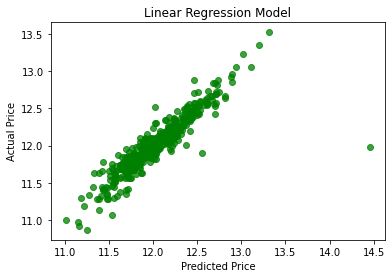

In [45]:
#Predicted vs Actual Graph using CV Data for Linear Regression
actual_values = y_cv
plt.scatter(y_predict1, actual_values, alpha=.75,color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [46]:
#Lasso Regression with CV to select best alpha automatically
print('"""""""""""""""""  2. Lasso Regression  CV """"""""""""""""""""""')
la = LassoCV()
la.fit(X_train,y_train)
y_predict2 = la.predict(X_cv)
print('\n\n Root Mean Square Error in Lasso Regression: ',sqrt(mean_squared_error(y_cv,y_predict2)))
r2_2 = r2_score(y_cv,y_predict2)
print('\n\nR2 Score in Lasso Regression: ',r2_2)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""  2. Lasso Regression  CV """"""""""""""""""""""


 Root Mean Square Error in Lasso Regression:  0.23942461326020192


R2 Score in Lasso Regression:  0.614441322218327
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


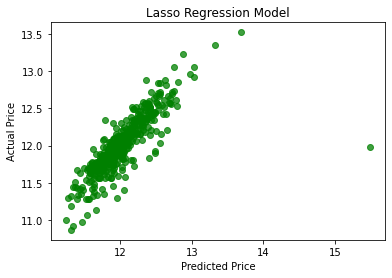

In [47]:
#Predicted vs Actual Graph using CV Data for Lasso Regression
actual_values = y_cv
plt.scatter(y_predict2, actual_values, alpha=.75,color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regression Model')
plt.show()

In [48]:
#Ridge Regression with CV to select best alpha automtically
print('"""""""""""""""""  3. Ridge Regression  CV """"""""""""""""""""""')
ri = RidgeCV()
ri.fit(X_train,y_train)
y_predict3 = ri.predict(X_cv)
print('\n\n Root Mean Square Error in Ridge Regression: ',sqrt(mean_squared_error(y_cv,y_predict3)))
r2_3 = r2_score(y_cv,y_predict3)
print('\n\nR2 Score in Ridge Regression: ',r2_3)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""  3. Ridge Regression  CV """"""""""""""""""""""


 Root Mean Square Error in Ridge Regression:  0.1706895079758536


R2 Score in Ridge Regression:  0.8040403991745132
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


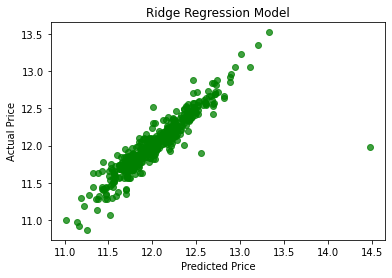

In [49]:
#Predicted vs Actual Graph using CV Data for Ridge Regression
actual_values = y_cv
plt.scatter(y_predict3, actual_values, alpha=.75,color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression Model')
plt.show()

In [50]:
#Elastic net: Ridge + Lasso Regression
print('"""""""""""""""""  4. ElasticNet Regression """"""""""""""""""""""')
e_net = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
e_net.fit(X_train,y_train)
y_predict4 = e_net.predict(X_cv)
print('\n\n Root Mean Square Error in ElasticNet Regression: ',sqrt(mean_squared_error(y_cv,y_predict4)))
r2_4 = r2_score(y_cv,y_predict4)
print('\n\nR2 Score in ElasticNet Regression: ',r2_4)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""  4. ElasticNet Regression """"""""""""""""""""""


 Root Mean Square Error in ElasticNet Regression:  0.17125809946845255


R2 Score in ElasticNet Regression:  0.8027326850339862
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


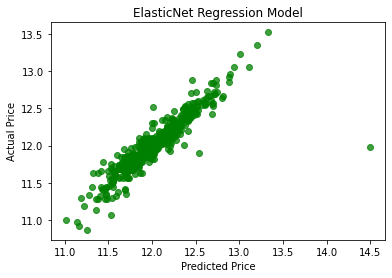

In [51]:
#Predicted vs Actual Graph using CV Data for ElasticNet Regression
actual_values = y_cv
plt.scatter(y_predict4, actual_values, alpha=.75,color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('ElasticNet Regression Model')
plt.show()

In [52]:
#Gradient Boosting Algorithm 
print('"""""""""""""""""  5. Gradient Boosting Regression """"""""""""""""""""""')
gra = GradientBoostingRegressor(random_state=0)
gra.fit(X_train,y_train)
y_predict5 = gra.predict(X_cv)
print('\n\n Root Mean Square Error in Gradient Boosting: ',sqrt(mean_squared_error(y_cv,y_predict5)))
r2_5 = r2_score(y_cv,y_predict5)
print('\n\nR2 Score in Gradient Boosting: ',r2_5)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""  5. Gradient Boosting Regression """"""""""""""""""""""


 Root Mean Square Error in Gradient Boosting:  0.1254698784502168


R2 Score in Gradient Boosting:  0.8941156322756973
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


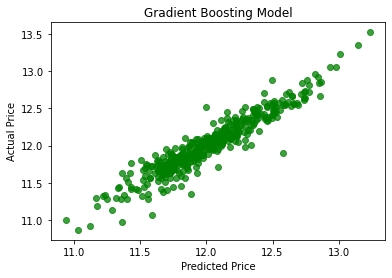

In [53]:
#Predicted vs Actual Graph using CV Data for Gradient Boosting
actual_values = y_cv
plt.scatter(y_predict5, actual_values, alpha=.75,color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Gradient Boosting Model')
plt.show()

In [54]:
#XGB Regressor with default values
xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)

#LGBM Regressor with default values
lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=12000, 
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4, 
                                       )

In [55]:
#XGB
xgb.fit(X_train,y_train)
y_predict6 = xgb.predict(X_cv)
print('"""""""""""""""""  6. XGB Regression """"""""""""""""""""""')
print('\n\n Root Mean Square Error in XGB: ',sqrt(mean_squared_error(y_cv,y_predict6)))
r2_6 = r2_score(y_cv,y_predict6)
print('\n\nR2 Score in XGB: ',r2_6)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

[04:13:43] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:49] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
"""""""""""""""""  6. XGB Regression """"""""""""""""""""""


 Root Mean Square Error in XGB:  0.12323608253651414


R2 Score in XGB:  0.8978522836438579
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


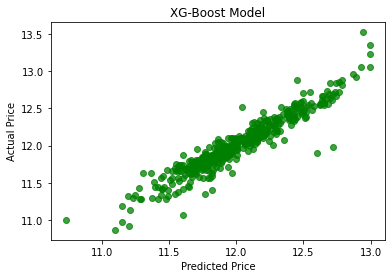

In [56]:
#Predicted vs Actual Graph using CV Data for XG-Boost
actual_values = y_cv
plt.scatter(y_predict6, actual_values, alpha=.75,color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XG-Boost Model')
plt.show()

In [57]:
#LGBM fitting
lgbm.fit(X_train,y_train)
y_predict7 = lgbm.predict(X_cv)
print('"""""""""""""""""  7. LGBM Regression """"""""""""""""""""""')
print('\n\n Root Mean Square Error in LGBM: ',sqrt(mean_squared_error(y_cv,y_predict7)))
r2_7 = r2_score(y_cv,y_predict7)
print('\n\nR2 Score in LGBM: ',r2_7)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""  7. LGBM Regression """"""""""""""""""""""


 Root Mean Square Error in LGBM:  0.12904276385332766


R2 Score in LGBM:  0.8879994370462735
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


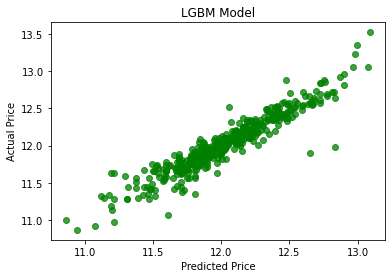

In [58]:
#Predicted vs Actual Graph using CV Data for LGBM
actual_values = y_cv
plt.scatter(y_predict7, actual_values, alpha=.75,color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('LGBM Model')
plt.show()

In [59]:
#Combining all the different regression models using stacked regression
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')
print('\n\n Using Stacked Regression: Combining all the seven different regression: ')
estimators = [
    ('lr', LinearRegression()),
    ('la', LassoCV()),
    ('Ri',RidgeCV()),
    ('e_net',ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)),
    ('lgbm',LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=12000, 
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4, 
                                       )) 
]
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


 Using Stacked Regression: Combining all the seven different regression: 
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


In [60]:
#Stack Regression
reg = StackingRegressor(
     estimators=estimators,
    final_estimator=XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)
)

In [61]:
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')
print('\n\n Score for Stacked Regression: ',reg.fit(X_train, y_train).score(X_cv, y_cv),'\n\n')
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
[04:14:16] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:17] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


 Score for Stacked Regression:  0.8875972974645968 


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


In [62]:
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')
final_predict = reg.predict(X_cv)
print('\n\n Root Mean Square Error Stacked CV: ',sqrt(mean_squared_error(y_cv,final_predict)))
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


 Root Mean Square Error Stacked CV:  0.12927422119750184
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


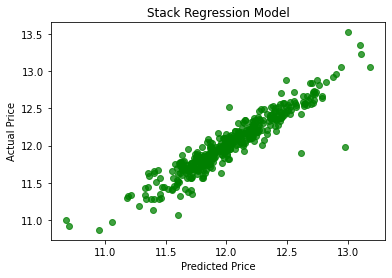

In [63]:
#Predicted vs Actual Graph using CV Data for Stack-Regression 
actual_values = y_cv
plt.scatter(final_predict, actual_values, alpha=.75,color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Stack Regression Model')
plt.show()

In [64]:
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')
print('Applying model on test file ')
final_predict_test = reg.predict(test)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Applying model on test file 
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


In [65]:
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')
print('Saving the output in submission.csv and uploaded on kaggle')
final = pd.DataFrame()
final['Id'] = test_id
final['SalePrice'] = np.exp(final_predict_test)
final.to_csv('submission.csv',index=False)
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Saving the output in submission.csv and uploaded on kaggle
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


In [66]:
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')
print('\n\nResults are in top 20% on Kaggle and can be further improved based on preprocessing and model fitting.\n\n')
print('"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""')

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


Results are in top 20% on Kaggle and can be further improved based on preprocessing and model fitting.


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
